#Machine Learning - Regression
##Assignemnt 4
###Rhichard Koh

In [1]:
!pip install latexify-py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 6.5 MB/s eta 0:00:00


##Repeat the task but using python code. Submit the python notebook and its pdf (convert ipynb to pdf after running all the cells so that code outputs become part of the pdf). Use latexify to convert code into math.

In [2]:
import pandas as pd
df = pd.DataFrame({"female": [0,1,0,1],
                  "read": [57,68,44,60],
                  "write": [52,59,33,62],
                  "hon": [0,0,0,1]})
df

,female,read,write,hon
0,0,57,52,0
1,1,68,59,0
2,0,44,33,0
3,1,60,62,1


In [3]:
X = df.drop(columns=['hon'])
y = df['hon']

In [4]:
import numpy as np

class LogisticRegression():
  def __init__(self, iterations=1000, alpha=0.01):
    self.iterations = iterations
    self.alpha = alpha

  def _sigmoid(self, z):
    return 1/(1 + np.exp(-z))

  def _dldw(self, N, X, y_pred, y):
    return (1/N) * np.dot(X.T, (y_pred-y))

  def _dldb(self, N, y_pred, y):
    return (1/N) * np.sum(y_pred-y)

  def _linear_model(self, X, weights, bias):
    return np.dot(X, weights) + bias
  
  def fit(self, X, y):
    N, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    for i in range(self.iterations):
      linear_model = self._linear_model(X, self.weights, self.bias)
      y_pred = self._sigmoid(linear_model)

      dw = self._dldw(N, X, y_pred, y)
      db = self._dldb(N, y_pred, y)

      self.weights -= self.alpha * dw
      self.bias -= self.alpha * db


  def predict(self, X):
    linear_model = self._linear_model(X, self.weights, self.bias)
    y_pred = self._sigmoid(linear_model)
    return [1 if i > 0.5 else 0 for i in y_pred]

In [5]:
test = LogisticRegression()

In [6]:
test.fit(X,y)

In [7]:
test.predict(X)

[0, 0, 0, 1]

In [8]:
test.weights

array([ 0.15123229, -1.24398306,  1.27668609])

In [9]:
test.bias

-0.02327314294433345

##Latexified Version

In [10]:
import latexify

@latexify.function
def sigmoid(z):
  return 1/(1 + np.exp(-z))

@latexify.function
def dldw(N, X, y_pred, y):
  return (1/N) * np.dot(X.T, (y_pred-y))

@latexify.function
def dldb(N, y_pred, y):
  return (1/N) * np.sum(y_pred-y)

@latexify.function
def linearmodel(X, weights, bias):
  return np.dot(X, weights) + bias

In [11]:
sigmoid

In [12]:
dldw

In [13]:
dldb

In [14]:
linearmodel

##Train, evaluate and compare logistic regression models for a class imbalance problems. Submit the python notebook and as well as its pdf.

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('https://raw.githubusercontent.com/ROCCYK/MachineLearning-Classification/main/Assignemnt2/hypothyroid.csv',na_values=['?'])
df

,response,age,sex,on_thyroxine,antithyroid_medication,thyroid_surgery,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,30.0,0.6,15.0,1.48,10.0
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,145.0,1.7,19.0,1.13,17.0
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,0.0,0.2,4.0,1.00,0.0
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,430.0,0.4,6.0,1.04,6.0
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,7.3,1.2,57.0,1.28,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58.0,F,f,f,f,f,f,f,f,f,5.8,1.7,86.0,0.91,95.0
3159,negative,29.0,F,f,f,f,f,f,f,f,f,0.8,1.8,99.0,1.01,98.0
3160,negative,77.0,M,f,f,f,f,f,f,f,f,1.2,0.6,71.0,0.68,104.0
3161,negative,74.0,F,f,f,f,f,f,f,f,f,1.3,0.1,65.0,0.48,137.0


Checking for na values.

In [16]:
df.isna().sum()

response                    0
age                       446
sex                        73
on_thyroxine                0
antithyroid_medication      0
thyroid_surgery             0
pregnant                    0
sick                        0
tumor                       0
lithium                     0
goitre                      0
TSH                       468
T3                        695
TT4                       249
T4U                       248
FTI                       247
dtype: int64

dropping na value rows

In [17]:
df = df.dropna()

encoding

In [18]:
def class_convert(response):
    if response=='hypothyroid':
        return 1
    else:
        return 0
df['response']=df['response'].apply(class_convert)

<ipython-input-18-104cb49d5f85>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['response']=df['response'].apply(class_convert)


In [19]:
df_dummies = pd.get_dummies(df, columns=['sex','on_thyroxine','antithyroid_medication','thyroid_surgery','pregnant','sick','tumor','lithium','goitre'])
df_dummies

,response,age,TSH,T3,TT4,T4U,FTI,sex_F,sex_M,on_thyroxine_f,...,pregnant_f,pregnant_t,sick_f,sick_t,tumor_f,tumor_t,lithium_f,lithium_t,goitre_f,goitre_t
0,1,72.0,30.0,0.6,15.0,1.48,10.0,0,1,1,...,1,0,1,0,1,0,1,0,1,0
1,1,15.0,145.0,1.7,19.0,1.13,17.0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
2,1,24.0,0.0,0.2,4.0,1.00,0.0,0,1,1,...,1,0,1,0,1,0,1,0,1,0
3,1,24.0,430.0,0.4,6.0,1.04,6.0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
4,1,77.0,7.3,1.2,57.0,1.28,44.0,0,1,1,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,0,58.0,5.8,1.7,86.0,0.91,95.0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
3159,0,29.0,0.8,1.8,99.0,1.01,98.0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
3160,0,77.0,1.2,0.6,71.0,0.68,104.0,0,1,1,...,1,0,1,0,1,0,1,0,1,0
3161,0,74.0,1.3,0.1,65.0,0.48,137.0,1,0,1,...,1,0,1,0,1,0,1,0,1,0


###Logistic Regression Raw

Checking for class imbalance.

Class Split
0    1878
1     122
Name: response, dtype: int64


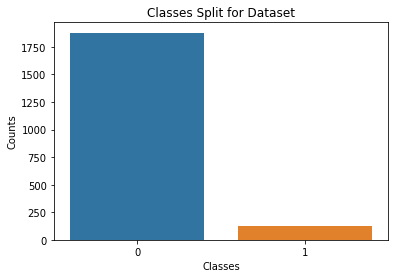

In [20]:
print('Class Split')
print(df_dummies.response.value_counts())
sns.countplot(data=df_dummies,x='response').set(title='Classes Split for Dataset', xlabel='Classes',ylabel='Counts')
plt.show()

In [21]:
#Define x and y variable
x = df_dummies.drop('response',axis=1).to_numpy()
y = df_dummies['response'].to_numpy()

# Create Train and Test Datasets with test_size=.30
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train, y_test = train_test_split(x, y, test_size=0.30,stratify=y,random_state=42)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train1)
X_test = sc.transform(x_test1)

In [22]:
print("Training set shape",X_train.shape)
print("Test set shape",X_test.shape)

Training set shape (1400, 24)
Test set shape (600, 24)


In [23]:
from sklearn.linear_model import LogisticRegression

clf1 = LogisticRegression(C=1.0, class_weight='balanced', dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                           max_iter=100, multi_class='auto', n_jobs=None, penalty='l2', random_state=None, solver='newton-cg', tol=0.001,
                           verbose=0, warm_start=False)
clf1.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', solver='newton-cg', tol=0.001)

Model Evaluation

In [24]:
print(f'Intercept: {clf1.intercept_}')
print(f'Coefficients: {clf1.coef_}')
print(f'Accuracy: {clf1.score(X_test,y_test)}')

Intercept: [-5.69597472]
Coefficients: [[ 0.77186067  1.40347246  0.04678591 -1.88307729  0.83474047 -3.30241311
  -0.11296004  0.11296004  0.19215136 -0.19215136  0.13037301 -0.13037301
   0.01135151 -0.01135151  0.22213122 -0.22213122  0.11096054 -0.11096054
   0.10856279 -0.10856279  0.08510105 -0.08510105 -0.02234262  0.02234262]]
Accuracy: 0.9633333333333334


In [25]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf1.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       563
           1       0.64      0.92      0.76        37

    accuracy                           0.96       600
   macro avg       0.82      0.94      0.87       600
weighted avg       0.97      0.96      0.97       600



In [26]:
print(confusion_matrix(y_test,y_pred))

[[544  19]
 [  3  34]]


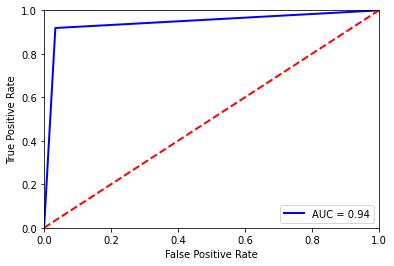

In [27]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
threshold = 0.5
y_score = (clf1.predict_proba(X_test)[:,1] > threshold).astype('float')
fpr,tpr, thresholds = roc_curve(y_test, y_score)

plt.plot(fpr, tpr, color='blue', lw=2, label = 'AUC = %0.2f' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="best")
plt.show()

##Finding Key Features

In [28]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(estimator=clf1)
selector.fit(X_train,y_train)
selector.get_support()

selection = df_dummies.drop('response', axis=1)
selection = list(selection.columns[selector.get_support()])
print('key features: ',selection)

key features:  ['age', 'TSH', 'TT4', 'T4U', 'FTI']


###Logistic Regression with SMOTE

In [29]:
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(StandardScaler(), LogisticRegression())

In [30]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority', random_state=42, n_jobs=-1)

X_resample,y_resample = smote.fit_resample(df_dummies.drop(columns=['response']),df_dummies['response'])
df_resample = pd.concat([pd.DataFrame(y_resample), pd.DataFrame(X_resample)], axis=1)
df_resample.columns = df_dummies.columns

/usr/local/lib/python3.9/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


1    1878
0    1878
Name: response, dtype: int64

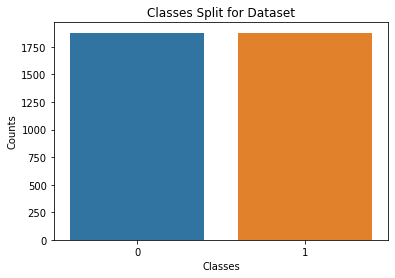

In [31]:
#Now it has an even amount of responses
sns.countplot(data=df_resample, x='response').set(title='Classes Split for Dataset', xlabel='Classes',ylabel='Counts')
df_resample.response.value_counts()

In [32]:
#Only selecting key features
X = df_resample[['age', 'FTI', 'TSH', 'TT4', 'T4U']]
y = df_resample['response']

In [33]:
X_train_resample, X_test_resample, y_train_resample, y_test_resample = train_test_split(X, y, test_size=0.30,stratify=y,random_state=42)

In [34]:
pipeline.fit(X_train_resample,y_train_resample)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

Evaluation for the Model after SMOTE

In [35]:
#Optimizing for recall
threshold = 0.3
y_pred_resample = (pipeline.predict_proba(X_test_resample)[:, 1] > threshold).astype('float')
confusion_matrix(y_test_resample, y_pred_resample)
df=pd.DataFrame(confusion_matrix(y_test_resample, y_pred_resample),columns=['Predict-NO','Predict-YES'],index=['NO','YES'])
print(df)

     Predict-NO  Predict-YES
NO          525           39
YES           6          557


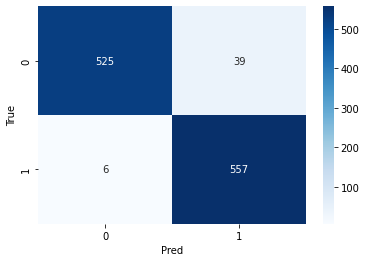

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cm = confusion_matrix(y_test_resample, y_pred_resample, labels=pipeline.classes_)
sn.heatmap(cm,cmap="Blues", annot=True,fmt='g')
plt.xlabel('Pred')
plt.ylabel('True')
plt.show()

In [37]:
print(classification_report(y_test_resample,y_pred_resample))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       564
           1       0.93      0.99      0.96       563

    accuracy                           0.96      1127
   macro avg       0.96      0.96      0.96      1127
weighted avg       0.96      0.96      0.96      1127



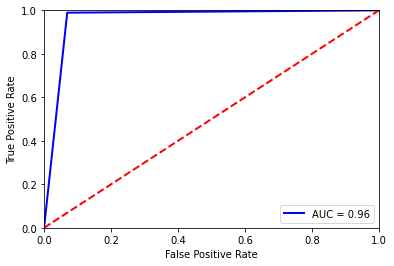

In [38]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
threshold = 0.3
y_score = (pipeline.predict_proba(X_test_resample)[:, 1] > threshold).astype('float')
fpr,tpr, thresholds = roc_curve(y_test_resample, y_score)

plt.plot(fpr, tpr, color='blue', lw=2, label = 'AUC = %0.2f' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="best")
plt.show()

After using SMOTE to balance our data and optimizing our threshold for recall, we managed to increase our AUC from 0.94 to 0.96



#Research and share your notes about double-descent

The phenomenon of double descent describes how the performance of a complicated machine learning model improves first as the amount of the training data increases, then degrades, and then improves again when the number of training instances grows very big.

This phenomenon was originally seen in overparameterized models, which contain more parameters than training samples. Overparameterization was once considered to always result in overfitting, but tests have shown that in some situations, the model can actually generalise better with more parameters, as long as it is trained on a suitably big dataset.

The double descent phenomena has been seen in a number of machine learning models, including deep neural networks, random forests, and support vector machines. It has significant consequences for machine learning model construction and training, particularly for high-dimensional data.

In summary, double descent is a phenomenon that can occur in various machine learning models, but is more likely to occur in overparameterized models. Deep neural networks, kernel machines, and random forest models are all examples of models that have been shown to exhibit double descent in certain settings.